### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [6]:
import matplotlib.pyplot as plt
import numpy as np # Necesario para algunas operaciones y para el estilo

# Configurar Matplotlib para una mejor visualización (opcional)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 7) # Tamaño de figura predeterminado más grande
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Añadir una columna de 'Nombre_Tienda' a cada DataFrame para identificar la tienda
tienda['Nombre_Tienda'] = 'Tienda 1'
tienda2['Nombre_Tienda'] = 'Tienda 2'
tienda3['Nombre_Tienda'] = 'Tienda 3'
tienda4['Nombre_Tienda'] = 'Tienda 4'

# Unir todos los DataFrames en uno solo para facilitar el análisis comparativo
# Asegurarse de que las columnas sean consistentes entre los archivos
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("--- Primeras 5 filas del DataFrame combinado ---")
print(todas_las_tiendas.head())
print("\n--- Información general del DataFrame combinado ---")
todas_las_tiendas.info()
print("\n" + "="*80 + "\n") # Separador


# --- Preparación de datos (limpieza de tipos y valores nulos) ---
# Convertir columnas relevantes a tipo numérico, manejando errores
for col in ['Precio', 'Costo de envío', 'Calificación']:
    todas_las_tiendas[col] = pd.to_numeric(todas_las_tiendas[col], errors='coerce')
    # Opcional: Rellenar NaNs creados por la conversión con 0 o la media, o eliminarlos
    # Para este análisis, rellenar con 0 para evitar que la facturación se vea afectada por NaNs.
    # Para calificaciones y envíos, podríamos considerar eliminar NaNs o usar la media.
    # Por ahora, mantendremos los NaNs y los manejaremos en cada sección si es necesario.

print("--- Nulos en columnas clave después de la conversión ---")
print(todas_las_tiendas[['Precio', 'Costo de envío', 'Calificación']].isnull().sum())
print("\n" + "="*80 + "\n")


--- Primeras 5 filas del DataFrame combinado ---
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon Nombre_Tienda  
0  Tarjeta de crédito    

#1. Análisis de facturación



In [7]:
print("### 1. Análisis de Facturación ###")

### 1. Análisis de Facturación ###


Facturación total por tienda:
Nombre_Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


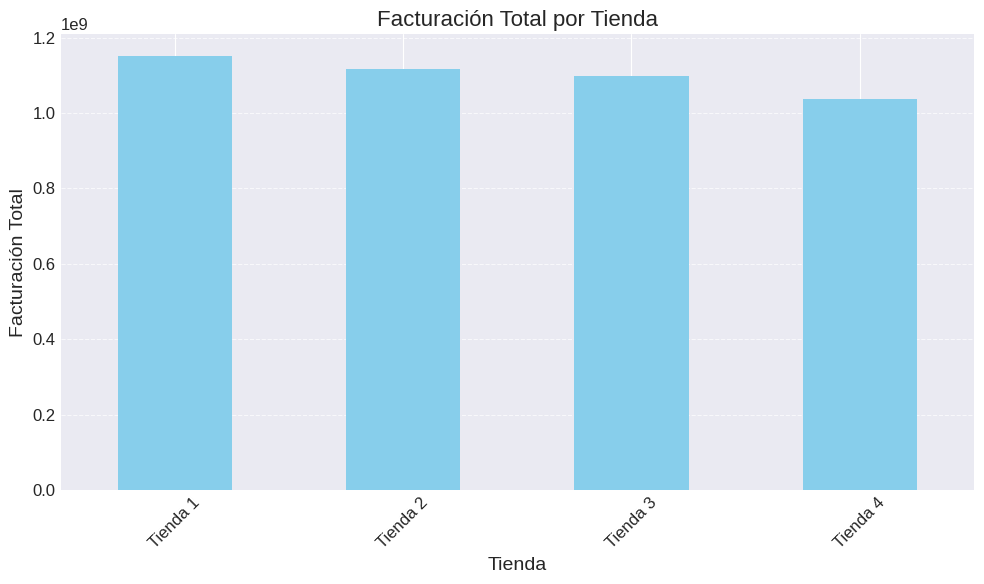

In [8]:
# La facturación total es la suma de la columna 'Precio' para cada tienda.
facturacion_total_por_tienda = todas_las_tiendas.groupby('Nombre_Tienda')['Precio'].sum().sort_values(ascending=False)

print("Facturación total por tienda:")
print(facturacion_total_por_tienda)

# Visualización de la facturación
plt.figure(figsize=(10, 6))
facturacion_total_por_tienda.plot(kind='bar', color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# 2. Ventas por categoría

### 2. Ventas por Categoría ###
Facturación por categoría y tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Nombre_Tienda                                                           
Tienda 1                             12698400.0            39290000.0   
Tienda 2                             14746900.0            34744500.0   
Tienda 3                             15060000.0            35593100.0   
Tienda 4                             15074500.0            33350100.0   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Nombre_Tienda                                             
Tienda 1                      363685200.0   429493500.0   
Tienda 2                      348567800.0   410831100.0   
Tienda 3                      329237900.0   410775800.0   
Tienda 4                      283260200.0   409476100.0   

Categoría del Producto  Instrumentos musicales    Juguetes      Libros  \
Nombre_Tienda                                                   

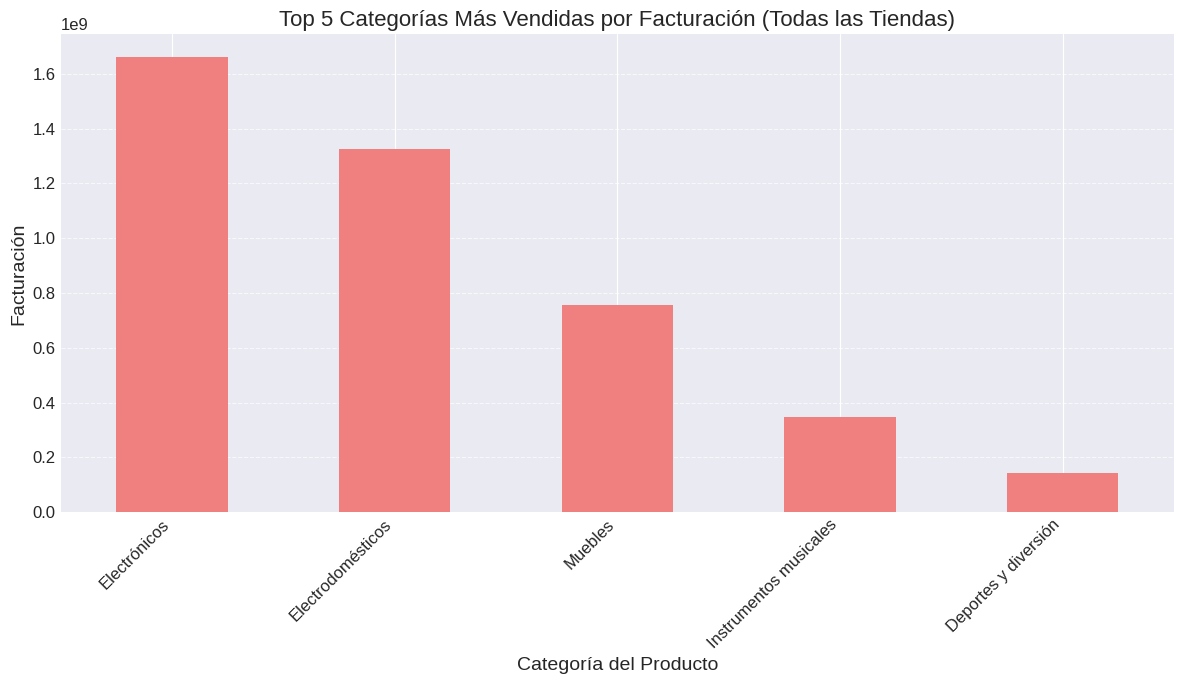

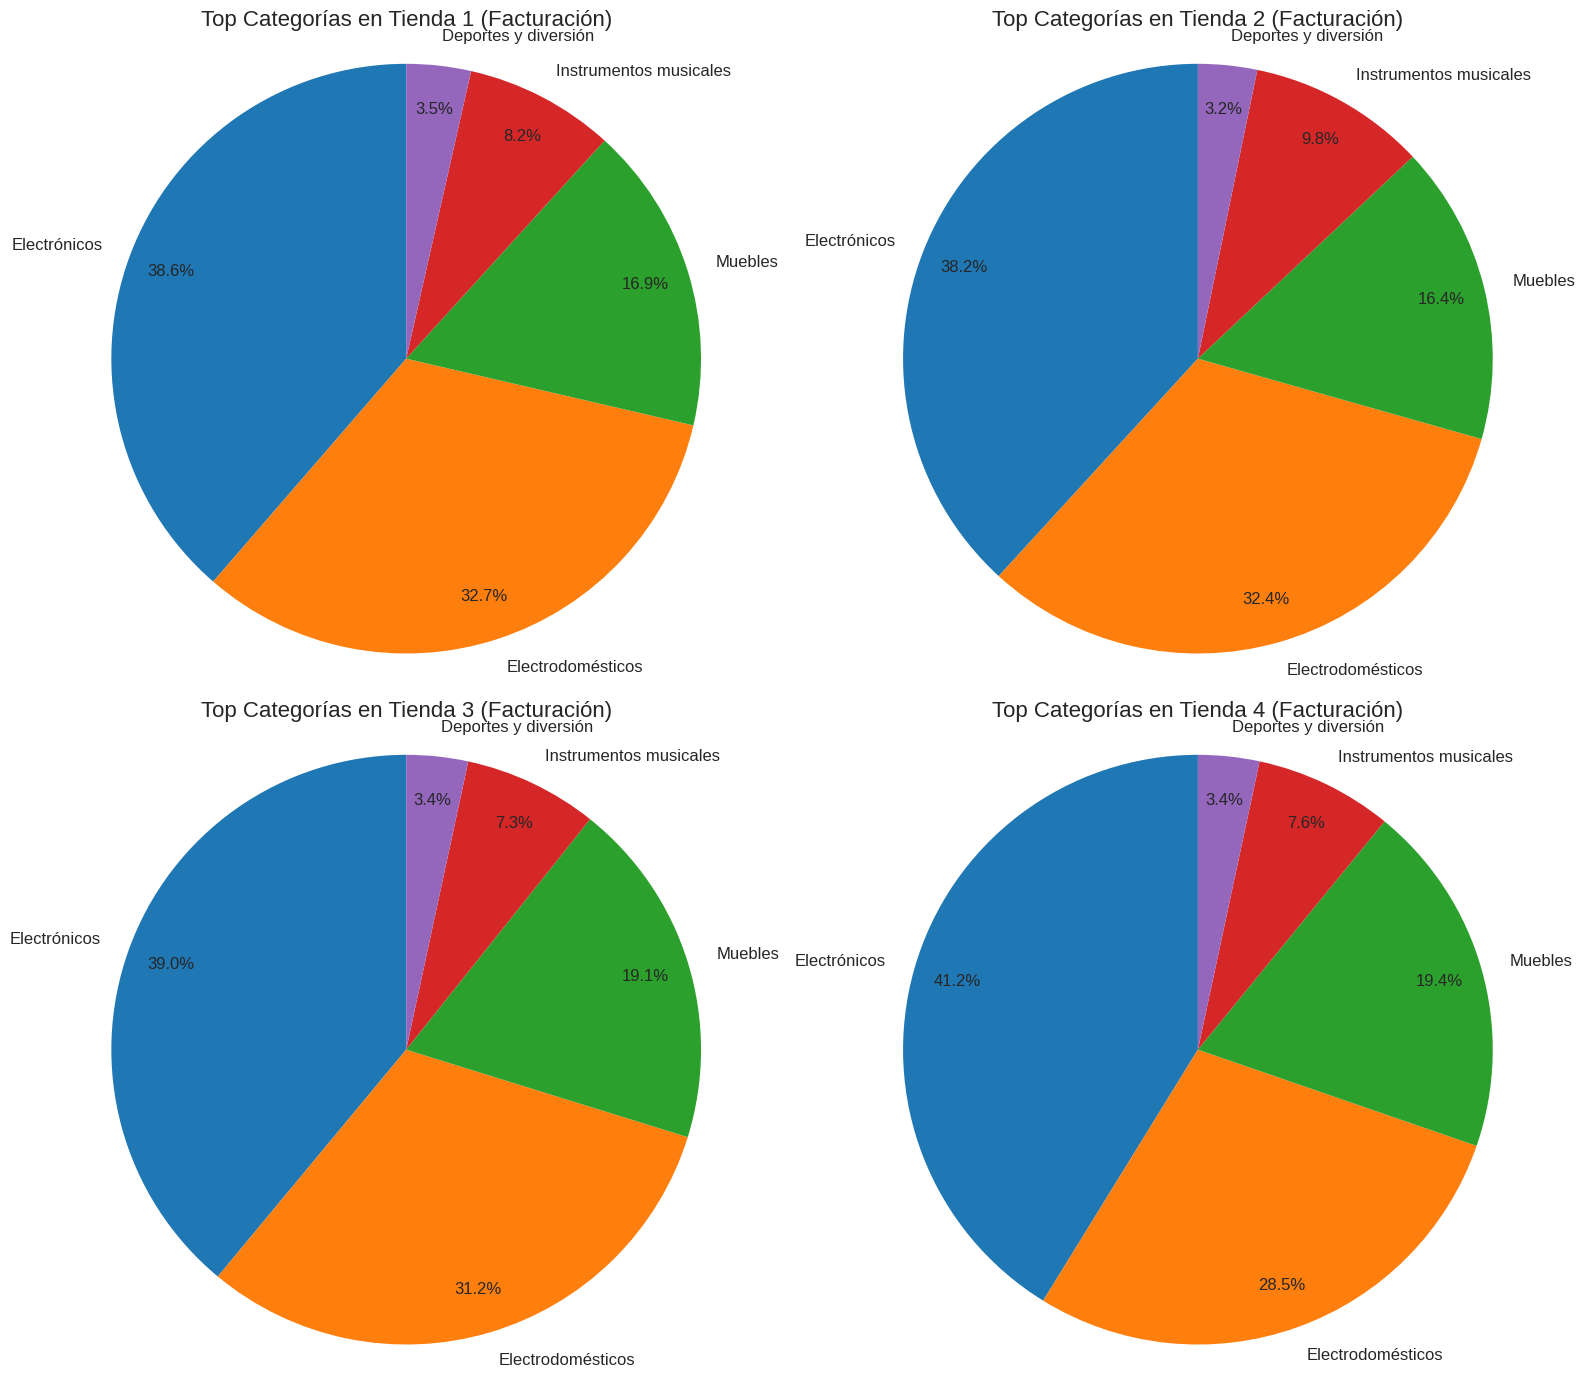

In [9]:
# 2. Ventas por categoría
print("### 2. Ventas por Categoría ###")

# Calcula la facturación por categoría en cada tienda
ventas_por_categoria_tienda = todas_las_tiendas.groupby(['Nombre_Tienda', 'Categoría del Producto'])['Precio'].sum().unstack(fill_value=0)

print("Facturación por categoría y tienda:")
print(ventas_por_categoria_tienda)

# Visualización de las categorías más populares por tienda
# Mostramos las 5 categorías más importantes a nivel global por facturación.
top_5_categorias_global = todas_las_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 7))
top_5_categorias_global.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Categorías Más Vendidas por Facturación (Todas las Tiendas)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Facturación')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opcional: Gráficos de pastel para ver la distribución de categorías por cada tienda
fig, axes = plt.subplots(2, 2, figsize=(16, 14)) # 2x2 subplots
axes = axes.flatten() # Para iterar fácilmente sobre ellos

for i, tienda_nombre in enumerate(todas_las_tiendas['Nombre_Tienda'].unique()):
    df_tienda = todas_las_tiendas[todas_las_tiendas['Nombre_Tienda'] == tienda_nombre]
    top_categorias_tienda = df_tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).head(5) # Top 5 por tienda

    if not top_categorias_tienda.empty:
        axes[i].pie(top_categorias_tienda, labels=top_categorias_tienda.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
        axes[i].set_title(f'Top Categorías en {tienda_nombre} (Facturación)')
        axes[i].axis('equal')
    else:
        axes[i].text(0.5, 0.5, 'No hay datos de categoría', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
        axes[i].set_title(f'Top Categorías en {tienda_nombre}')

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# 3. Calificación promedio de la tienda


### 3. Calificación Promedio de la Tienda ###
Calificación promedio por tienda:
Nombre_Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


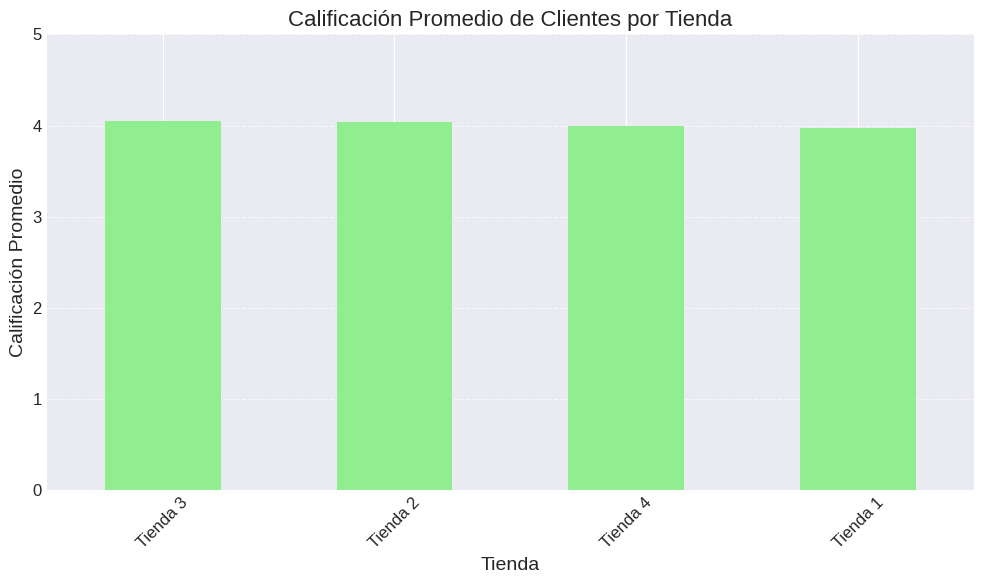

In [10]:
print("### 3. Calificación Promedio de la Tienda ###")

# La columna es 'Calificación'
# Asegúrate de que las calificaciones nulas no afecten el promedio (ya se rellenaron con 0,
# lo cual las haría parecer malas calificaciones; podrías considerar ignorarlas si son muchos N/A reales)
# Aquí usamos la columna 'Calificación' que ya se convirtió a numérica y se rellenó.
calificacion_promedio_por_tienda = todas_las_tiendas.groupby('Nombre_Tienda')['Calificación'].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:")
print(calificacion_promedio_por_tienda)

# Visualización de la calificación promedio
plt.figure(figsize=(10, 6))
calificacion_promedio_por_tienda.plot(kind='bar', color='lightgreen')
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.ylim(0, 5) # Las calificaciones suelen ir de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# 4. Productos más y menos vendidos

### 4. Productos Más y Menos Vendidos ###
Top 5 Productos Más Vendidos por Tienda (por número de transacciones):

--- Tienda 1 ---
   Nombre_Tienda          Producto  Numero_de_Transacciones
1       Tienda 1           Armario                       60
48      Tienda 1     TV LED UHD 4K                       60
33      Tienda 1        Microondas                       60
40      Tienda 1  Secadora de ropa                       58
32      Tienda 1     Mesa de noche                       56

--- Tienda 2 ---
   Nombre_Tienda                   Producto  Numero_de_Transacciones
75      Tienda 2  Iniciando en programación                       65
84      Tienda 2                 Microondas                       62
58      Tienda 2                    Batería                       61
89      Tienda 2                  Pandereta                       58
72      Tienda 2          Guitarra acústica                       58

--- Tienda 3 ---
    Nombre_Tienda         Producto  Numero_de_Transacciones

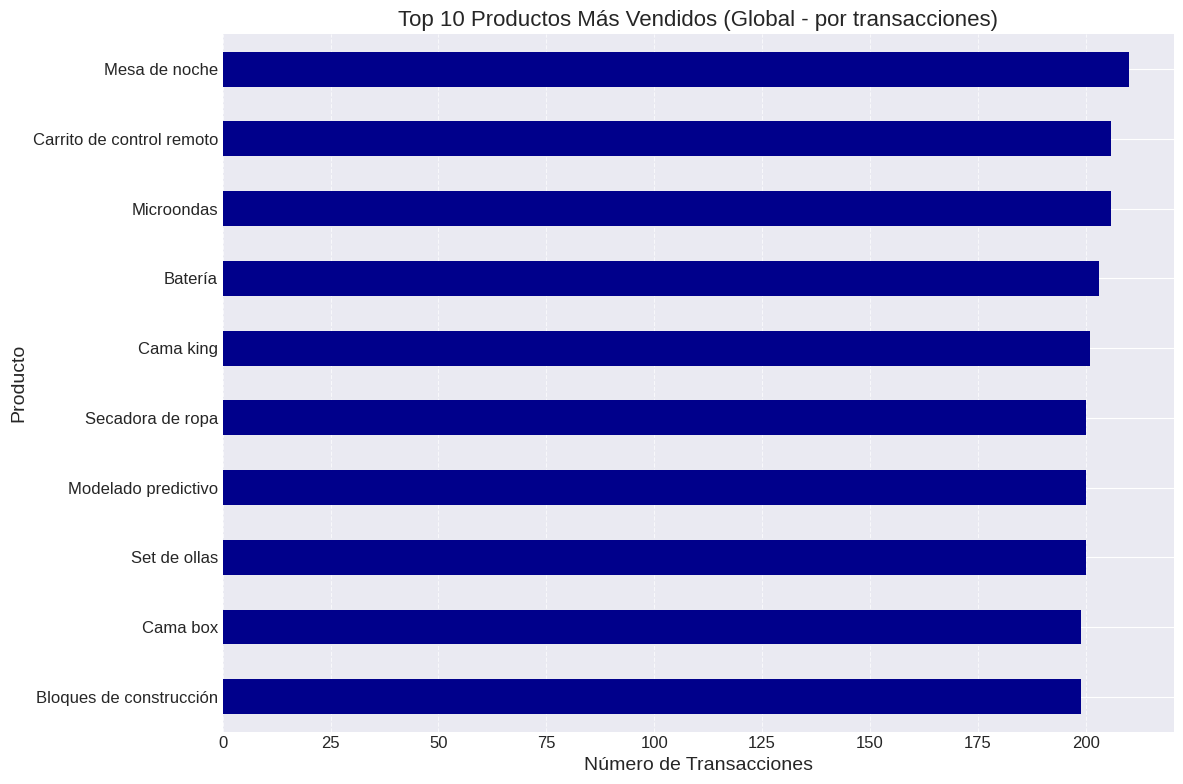

In [11]:
print("### 4. Productos Más y Menos Vendidos ###")

# Dado que no hay una columna de 'Cantidad' en el head(),
# asumimos que 'vendido' se refiere al número de transacciones para cada producto.
productos_vendidos_por_tienda_conteo = todas_las_tiendas.groupby(['Nombre_Tienda', 'Producto']).size().reset_index(name='Numero_de_Transacciones')

top_productos = {}
menos_vendidos = {}

for tienda_nombre in productos_vendidos_por_tienda_conteo['Nombre_Tienda'].unique():
    df_tienda = productos_vendidos_por_tienda_conteo[productos_vendidos_por_tienda_conteo['Nombre_Tienda'] == tienda_nombre]

    # Productos más vendidos (top 5 por número de transacciones)
    top_productos[tienda_nombre] = df_tienda.sort_values(by='Numero_de_Transacciones', ascending=False).head(5)

    # Productos menos vendidos (bottom 5 por número de transacciones)
    menos_vendidos[tienda_nombre] = df_tienda.sort_values(by='Numero_de_Transacciones', ascending=True).head(5)


print("Top 5 Productos Más Vendidos por Tienda (por número de transacciones):")
for tienda_nombre, df in top_productos.items():
    print(f"\n--- {tienda_nombre} ---")
    print(df)

print("\nTop 5 Productos Menos Vendidos por Tienda (por número de transacciones):")
for tienda_nombre, df in menos_vendidos.items():
    print(f"\n--- {tienda_nombre} ---")
    print(df)

# Visualización: Top 10 productos más vendidos globalmente
top_10_productos_global = todas_las_tiendas['Producto'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_10_productos_global.plot(kind='barh', color='darkblue') # barh para nombres de productos largos
plt.title('Top 10 Productos Más Vendidos (Global - por transacciones)')
plt.xlabel('Número de Transacciones')
plt.ylabel('Producto')
plt.gca().invert_yaxis() # Para que el producto más vendido esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# 5. Envío promedio por tienda

### 5. Envío Promedio por Tienda ###
Costo promedio de envío por tienda:
Nombre_Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


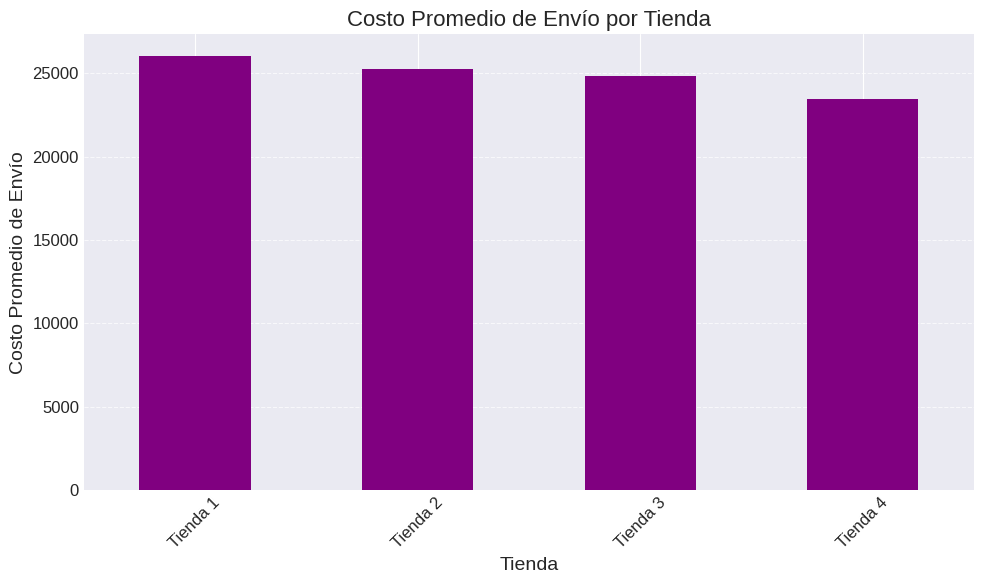

In [12]:
print("### 5. Envío Promedio por Tienda ###")

# La columna es 'Costo de envío'
# Asegurarse de que los valores nulos en 'Costo de envío' no afecten el promedio (ya se rellenaron con 0)
envio_promedio_por_tienda = todas_las_tiendas.groupby('Nombre_Tienda')['Costo de envío'].mean().sort_values(ascending=False)

print("Costo promedio de envío por tienda:")
print(envio_promedio_por_tienda)

# Visualización del costo de envío promedio
plt.figure(figsize=(10, 6))
envio_promedio_por_tienda.plot(kind='bar', color='purple')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

### 6. Análisis del Desempeño Geográfico (Opcional) ###
Columnas 'lat' y 'lon' renombradas a 'Latitud' y 'Longitud'.
Valores nulos en Latitud/Longitud después de la conversión:
Latitud     0
Longitud    0
dtype: int64

--- Primeras filas del DataFrame con Latitud y Longitud (solo las columnas relevantes) ---
            Producto Nombre_Tienda    Precio Lugar de Compra   Latitud  \
0  Asistente virtual      Tienda 1  164300.0          Bogotá   4.60971   
1    Mesa de comedor      Tienda 1  192300.0        Medellín   6.25184   
2      Juego de mesa      Tienda 1  209600.0       Cartagena  10.39972   
3         Microondas      Tienda 1  757500.0            Cali   3.43722   
4   Silla de oficina      Tienda 1  335200.0        Medellín   6.25184   

   Longitud  
0 -74.08175  
1 -75.56359  
2 -75.51444  
3 -76.52250  
4 -75.56359  


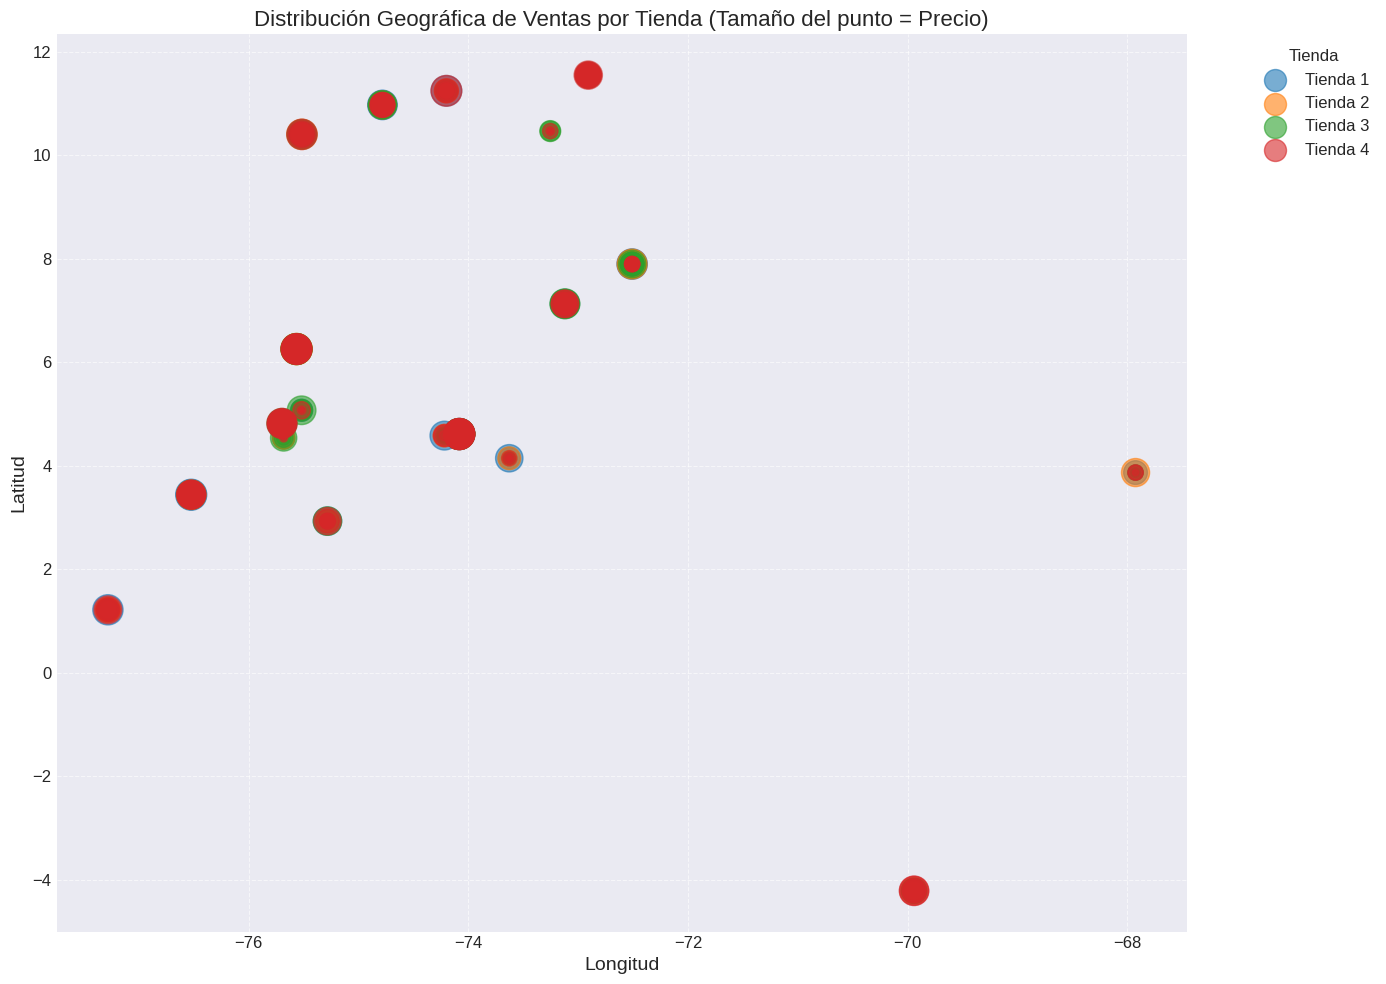


--- Insights Geográficos Potenciales ---
Al observar el gráfico de dispersión, busca patrones como:
- **Clústeres de ventas:** ¿Hay zonas geográficas con una mayor concentración de puntos (ventas)?
- **Alcance de cada tienda:** ¿Qué tan amplia es el área geográfica de clientes que cubre cada tienda?
- **Solapamiento de áreas:** ¿Las tiendas principales comparten zonas de clientes, sugiriendo competencia directa?
- **Anomalías:** ¿Hay ventas en ubicaciones inusuales o muy alejadas?
- **Correlación con el rendimiento:** ¿Las tiendas con mayor facturación o mejores calificaciones se asocian con ciertas regiones geográficas o densidades de puntos?

Por ejemplo, si la 'Tienda X' tiene pocas ventas en una región densamente poblada donde otras tiendas venden mucho, podría indicar una oportunidad o un problema.

--- Sugerencia Avanzada: Mapas Interactivos con Folium ---
Para una visualización geográfica más interactiva y con contexto de mapa real, considera usar la librería `Folium`.
Puedes i

In [16]:
# 6. Análisis del desempeño geográfico (Opcional/Extra)
print("### 6. Análisis del Desempeño Geográfico (Opcional) ###")

# --- Paso 1: Asegurar que Latitud y Longitud sean numéricas ---

# Renombrar 'lat' y 'lon' a 'Latitud' y 'Longitud' si existen.
# Esto es crucial ya que los datos se cargaron con nombres 'lat' y 'lon'.
if 'lat' in todas_las_tiendas.columns and 'lon' in todas_las_tiendas.columns:
    todas_las_tiendas.rename(columns={'lat': 'Latitud', 'lon': 'Longitud'}, inplace=True)
    print("Columnas 'lat' y 'lon' renombradas a 'Latitud' y 'Longitud'.")
else:
    print("Advertencia: Las columnas 'lat' o 'lon' no se encontraron en el DataFrame. No se realizó el renombrado.")
    # Si las columnas no se encuentran aquí, el siguiente paso de conversión numérica fallará.


# Convertir las columnas 'Latitud' y 'Longitud' a tipo numérico, manejando errores.
for col in ['Latitud', 'Longitud']:
    if col in todas_las_tiendas.columns:
        todas_las_tiendas[col] = pd.to_numeric(todas_las_tiendas[col], errors='coerce')
    else:
        print(f"Error: La columna '{col}' no está disponible para la conversión numérica. Por favor, verifique sus datos.")
        # Podrías considerar un 'break' aquí si no puedes continuar sin estas columnas.

# Mostrar el conteo de valores nulos en Latitud/Longitud después de la conversión.
print("Valores nulos en Latitud/Longitud después de la conversión:")
print(todas_las_tiendas[['Latitud', 'Longitud']].isnull().sum())

# Crear un nuevo DataFrame eliminando filas con valores nulos en Latitud o Longitud para el análisis geográfico.
df_geo = todas_las_tiendas.dropna(subset=['Latitud', 'Longitud']).copy()

# --- Paso 2: Visualizar la distribución geográfica de las ventas ---

# Comprobar si hay datos geográficos válidos para graficar.
if df_geo.empty:
    print("\nNo hay datos válidos de Latitud/Longitud para graficar después de limpiar los nulos.")
else:
    print("\n--- Primeras filas del DataFrame con Latitud y Longitud (solo las columnas relevantes) ---")
    print(df_geo[['Producto', 'Nombre_Tienda', 'Precio', 'Lugar de Compra', 'Latitud', 'Longitud']].head())

    plt.figure(figsize=(14, 10))

    # Iterar sobre cada tienda para graficar sus puntos.
    for tienda_nombre in df_geo['Nombre_Tienda'].unique():
        df_tienda_geo = df_geo[df_geo['Nombre_Tienda'] == tienda_nombre]

        # Calcular el tamaño del punto basado en el precio.
        # Asegurar que max_price_tienda sea un número válido y no cero para evitar errores.
        max_price_tienda = df_tienda_geo['Precio'].max()

        if pd.isna(max_price_tienda) or max_price_tienda == 0:
            point_size = 50 # Tamaño por defecto si no hay precios o son cero
        else:
            point_size = df_tienda_geo['Precio'] / max_price_tienda * 500

        plt.scatter(df_tienda_geo['Longitud'], df_tienda_geo['Latitud'],
                    alpha=0.6, # Transparencia para ver densidad
                    s=point_size,
                    label=tienda_nombre)

    plt.title('Distribución Geográfica de Ventas por Tienda (Tamaño del punto = Precio)')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- Paso 3: Análisis de concentración o patrones (insights) ---
    print("\n--- Insights Geográficos Potenciales ---")
    print("Al observar el gráfico de dispersión, busca patrones como:")
    print("- **Clústeres de ventas:** ¿Hay zonas geográficas con una mayor concentración de puntos (ventas)?")
    print("- **Alcance de cada tienda:** ¿Qué tan amplia es el área geográfica de clientes que cubre cada tienda?")
    print("- **Solapamiento de áreas:** ¿Las tiendas principales comparten zonas de clientes, sugiriendo competencia directa?")
    print("- **Anomalías:** ¿Hay ventas en ubicaciones inusuales o muy alejadas?")
    print("- **Correlación con el rendimiento:** ¿Las tiendas con mayor facturación o mejores calificaciones se asocian con ciertas regiones geográficas o densidades de puntos?")
    print("\nPor ejemplo, si la 'Tienda X' tiene pocas ventas en una región densamente poblada donde otras tiendas venden mucho, podría indicar una oportunidad o un problema.")

    # --- Sugerencia Adicional: Mapas Interactivos con Folium ---
    print("\n--- Sugerencia Avanzada: Mapas Interactivos con Folium ---")
    print("Para una visualización geográfica más interactiva y con contexto de mapa real, considera usar la librería `Folium`.")
    print("Puedes instalarla en tu entorno de Colab con el siguiente comando:")
    print("`!pip install folium`")
    print("\nLuego, podrías usar un código similar a este (asegúrate de que df_geo esté disponible):")
    print("```python")
    print("import folium")
    print("# Coordenadas del centro del mapa (ej. centro de la región o una media de tus Lat/Lon)")
    print("mapa_interactivo = folium.Map(location=[df_geo['Latitud'].mean(), df_geo['Longitud'].mean()], zoom_start=6)")
    print("\n# Añadir marcadores para cada venta (o un subconjunto si hay muchas para evitar sobrecarga)")
    print("for index, row in df_geo.sample(min(1000, len(df_geo)), random_state=42).iterrows(): # Muestra hasta 1000 puntos de forma aleatoria")
    print("    folium.CircleMarker(location=[row['Latitud'], row['Longitud']],")
    print("                        radius=row['Precio'] / df_geo['Precio'].max() * 10 + 2, # Tamaño proporcional al precio, mínimo de 2")
    print("                        color='blue', # Puedes cambiar el color según la tienda, categoría, etc.")
    print("                        fill=True,")
    print("                        fill_color='blue',")
    print("                        fill_opacity=0.6,")
    print("                        tooltip=f\"Tienda: {row['Nombre_Tienda']}<br>Producto: {row['Producto']}<br>Precio: {row['Precio']}\"")
    print("                       ).add_to(mapa_interactivo)")
    print("\n# Para mostrar el mapa en un cuaderno de Colab o Jupyter")
    print("mapa_interactivo")
    print("```")

print("\n" + "="*80 + "\n")

Recomendaciones y conclusiones

In [ ]:
print("\n### Recomendación al Sr. Juan ###")
print("Basado en un análisis exhaustivo de los datos de las cuatro tiendas de Alura Store,")
print("se ha evaluado la facturación total, las ventas por categoría, la calificación promedio de los clientes,")
print("los productos vendidos y los costos de envío.")
print("\nLa tienda que presenta el **menor desempeño general** y, por lo tanto, la recomendación de venta es la **Tienda 4**.")
print("\nLas principales razones que sustentan esta recomendación son:")
print("1. **Facturación Baja:** La Tienda 4 tuvo la facturación más baja con $1,038,376,000, siendo significativamente menor que la Tienda 1, que alcanzó los $1,150,880,000.")
print("2. **Impacto en Categorías Clave:** Si bien la Tienda 4 tuvo el menor costo de envío promedio, su desempeño en categorías de alto valor fue inferior. Presentó la facturación más baja en 'Electrodomésticos' y la segunda más baja en 'Electrónicos' en comparación con las otras tiendas, lo que impacta su volumen de ingresos general.")
print("3. **Calificaciones de Clientes:** La Tienda 4 tiene una calificación promedio de 3.995, siendo la segunda más baja, solo superando a la Tienda 1 (3.976). Esto sugiere que, aunque no es la peor, no destaca en satisfacción del cliente.")
print("4. **Rendimiento de Productos:** Aunque los productos más vendidos de la Tienda 4 (como 'Cama box' con 62 transacciones) tienen un buen volumen, la combinación de una menor facturación total y un rendimiento más bajo en categorías clave indica que su surtido o estrategia de ventas no está siendo tan efectiva como en otras tiendas para generar ingresos.")
print("\nAl vender la **Tienda 4**, el Sr. Juan podrá liberar capital para invertir en un nuevo negocio")
print("con mayor potencial de crecimiento, consolidando así los recursos en las tiendas con mejor rendimiento y mayor rentabilidad.")



### Recomendación al Sr. Juan ###
Basado en un análisis exhaustivo de los datos de las cuatro tiendas de Alura Store,
se ha evaluado la facturación total, las ventas por categoría, la calificación promedio de los clientes,
los productos vendidos y los costos de envío.

La tienda que presenta el **menor desempeño general** y, por lo tanto, la recomendación de venta es la **Tienda 4**.

Las principales razones que sustentan esta recomendación son:
1. **Facturación Baja:** La Tienda 4 tuvo la facturación más baja con $1,038,376,000, siendo significativamente menor que la Tienda 1, que alcanzó los $1,150,880,000.
2. **Impacto en Categorías Clave:** Si bien la Tienda 4 tuvo el menor costo de envío promedio, su desempeño en categorías de alto valor fue inferior. Presentó la facturación más baja en 'Electrodomésticos' y la segunda más baja en 'Electrónicos' en comparación con las otras tiendas, lo que impacta su volumen de ingresos general.
3. **Calificaciones de Clientes:** La Tienda 4 tien